<a href="https://colab.research.google.com/github/eminbustun/CS210/blob/main/Homework%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - Data Wrangling


*In this homework, you are going to work on a real-world dataset and perform some data transformations. We suggest you start the homework early.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw2`</font>.

2. Write your solutions in the cells  marked as <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs**. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed on the notebook.

4. When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


  a. Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.

  b. Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, please use the discussion page on Sucourse.

---

**Important Note: In this homework, you are not allowed to use Pandas.**

In this homework, you will work on a dataset from [Kaggle-Medium-2021-Data-Science-Articles](https://www.kaggle.com/datasets/viniciuslambert/medium-2021-data-science-articles-dataset). The dataset contains information on data science articles shared on Medium.com in 2021.

For this homework, you will use the provided file `Medium_DS_Articles_2021_Dataset.csv`. This is a modified version of the original dataset.
<!-- This is not the original data file, we modified and eliminated some parts. -->

In the dataset, each row has 7 attribute values separated with `,`. These attributes are described in the list below with their respective order in the dataset.


  1.   **url:** Refers to the url of the article

  2.   **author:** Who has written the article

  3.   **claps** Similar to "Likes" on Social Media

  4.   **responses:** Comments written to the articles
  
  5.   **reading_time:** Reading time of articles recorded by Medium.com (In minutes)
  
  6.   **date:** The date the article was written


A snapshot from the dataset containing three sample rows is also provided below.
```
['https://medium.com/@sellforte-insights/bayesian-data-analysis-a-brave-new-world-of-statistics-1fc3167812d7','sellforte-insights', '0.0', '0.0', '9-min', 'Data Science','2021-05-19']
['https://towardsdatascience.com/how-to-improve-deep-learning-forecasts-for-time-series-part-2-c11efc8dfee2','michaelberk', '106.0', '0.0', '5-min', 'Machine Learning','2021-10-26']
['https://medium.com/@paulshin17/intro-on-linear-regression-using-keras-predicting-real-estate-price-f0e94de1b912','paulshin17', '107.0', '0.0', '6-min', 'Data Science','2021-10-18']
...
```

*Do not forget to add the shared `Medium_DS_Articles_2021_Dataset.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

**!!!IMPORTANT: You are not allowed to use `pandas` in this homework**

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive/'

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

## 10 Points - Q1: Read the Dataset

In the provided dataset, entries are separated by commas. Read and store the file as a 2D numpy array. Each column should capture the corresponding fields.

- Read the given file into a numpy array.
- Print the number of rows and columns.
- Print the number of unique Tags.

Example Output:
```
Number of rows: 36810, columns: 7
Number of unique Tags: 8
```

*Hint: Do not forget to skip the first line (the header).*

In [ ]:
input = "Medium_DS_Articles_2021_Dataset.csv"

f = open(path_prefix + input,"r")

a = f.readlines()

nw = a[1:] # slip the header line

ndarray = np.genfromtxt(nw, dtype='str', delimiter=",") # read nw and store it in 2d numpy array

columns = len(ndarray[0])

rows = len(ndarray)

print("Number of rows:", rows,", columns:",columns)

tags = {} # dictionary for finding the tags and their occurence number

for i in ndarray:
  tag = i[5]
  if tag in tags:
    tags[tag] += 1 
  else:
    tags[tag] = 1

unique_tags = len(tags)

print("Number of unique Tags:", unique_tags)

Number of rows: 36810 , columns: 7
Number of unique Tags: 8


## 30 Points - Q2: Exploring Dataset

### 15 Points - Part A

The tag field makes it easy to find the articles on the related topic. Examining the tags used in articles written in 2021 can give us information about which field has become more popular.

- Print the name of each unique Tag and its frequency in data from the most frequent to least

Example output:
```
Data Science           -   9033
Machine Learning       -   7732
Artificial Inteligence -   7552
Data                   -   4810
Deep Learning          -   2903
X                      -   1674
Big Data               -   1579
Analytics              -   1527
```

In [ ]:
# first, i should sort the dictionary tags

sortd = sorted(tags.items(), key=lambda item:item[1],reverse=True)

tags = dict(sortd)

# sort part is done


for k,v in tags.items():
  print(f'{k:25}-   {v}') # I wrote it like this because I want it to be look alike in output you gave.
  
  


Data Science             -   9033
Machine Learning         -   7732
Artificial Inteligence   -   7552
Data                     -   4810
Deep Learning            -   2903
X                        -   1674
Big Data                 -   1579
Analytics                -   1527


### 15 Points - Part B

When we examined the frequency of the tags, we learned that more articles were written about which topic. But there is a tag called '**X**' and we don't know what it means. We may want to check the rows containing this Tag and examine what they are. When we examine these, we see they all have the similar structure and there is something strange in the '**date**' field. We want you to rearrange these corrupted date fields so that every '**date**' value in the same format.

**Note:** Some of the examples can be seen below where %Y represents years (e.g. 2022, 2021), %m month as a zero-padded decimal number (e.g. 07, 08) and %d day of the month as a zero-padded decimal number (e.g. 01, 03). You may assume that the order of date elements is always the same in the raw data: %Y %m %d.


Corrupted Date formats are as follows:
```
'(%Y)::(%m)::(%d)', 
'%Y %m %d'
```
You **MUST** use **regular expressions** for this question. (Use the **re** library of Python)
- Write a **function** that checks the format of date feature and returns True if all observations are in the expected format, otherwise returns False.
    - **Name of the function**: validate_date_format
    - **Input**: Date column
    - **Output**: True if all date values are in the expected format (%Y-%m-%d --- 2022-10-22), otherwise False
- Then, convert the **date** feature to the expected format.

```
Expected Date Format: '%Y-%m-%d' --> '2022-10-22'
```

In [ ]:
def validate_date_format(date_column):
  
  for n in ndarray:
    wanted_date_type = re.findall(r"[\d]{4}-[\d]{2}-[\d]{2}",n[date_column])
    if wanted_date_type == []: # if cannot find any date like expressed in the upper sentence.
      return False
  return True
   
a = validate_date_format(6)

if a == False: 
  for k in ndarray:
     wrong_data_type = re.findall(r"[\d]{4}\s[\d]{2}\s[\d]{2}",k[6]) #'%Y %m %d'
     wrong_data_type2 = re.findall(r"\([\d]{4}\)::\([\d]{2}\)::\([\d]{2}\)",k[6]) #'(%Y)::(%m)::(%d)'

     if wrong_data_type != []:
       k[6] = wrong_data_type[0].replace(" ","-")
       
    
     if wrong_data_type2 != []:
       k[6] = wrong_data_type2[0].replace("::","-").replace(")","").replace("(","")
       
    



## 20 Points - Q3: Cleaning Data

We learned that there are some removed articles. In Q2 Part B, we rearranged the format of the date feature. In this part, we will examine in which month more articles were deleted.

- Display the total number of deleted articles per each month as a bar chart
- At the end, delete these removed articles from the dataset



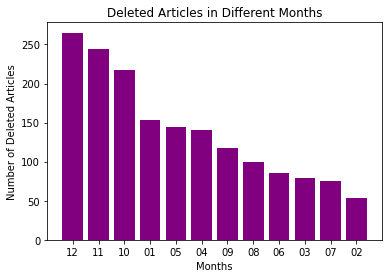

In [ ]:
#############################################################################################
dictionary_for_months = {}

for o in ndarray:

  if o[5] == "X":

    mymatch = re.findall("-[\d]{2}-", o[6])
    for z in mymatch:
      str_without = z.replace("-","")
      
      if str_without in dictionary_for_months:
        dictionary_for_months[str_without] += 1
      else:
        dictionary_for_months[str_without] = 1

    
dictionary_for_months = dict(sorted(dictionary_for_months.items(), key=lambda item:item[1], reverse=True))

left = dictionary_for_months.keys()

right = dictionary_for_months.values()



plt.bar(left,right, color='purple')

plt.xlabel("Months")

plt.ylabel("Number of Deleted Articles")

plt.title("Deleted Articles in Different Months")

plt.show()
#####################################################################################

lstn = []

counter = 0
for one in ndarray:
  if one[5] == "X":
    lstn.append(counter)
  counter += 1



new_ndarray = np.delete(ndarray,lstn,0)



## 40 Points - Q4: Features of Medium Articles

### 10 Points - Part A

In this question, we will examine the different features of the articles on Medium. In Q3, we deleted the removed articles to examine the data that is not missing. First, let's check the new shape of our dataset.

- Print the new number of rows and columns after dropping missing values.

Medium has reading times calculated automatically by the site's own method which you can find in data. Take a quick look at the basic statistical information of this feature. 

- Print the maximum, minimum and average reading time of articles

Example Output:
```
After cleaning, Number of rows: 35136, columns: 7
Maximum reading time: 131.0
Minimum reading time: 0.0
Average reading time: 5.041182832422587
```

In [ ]:
new_row = len(new_ndarray)

new_cols = len(new_ndarray[0])
############################
cons = 0

print("After cleaning, Number of rows:",new_row, ", columns:",new_cols)

for rt in new_ndarray:
  numt = rt[4].find("-")
  numte = float(rt[4][0:numt])
  if numte > cons:
    cons = numte

print("Maximum reading time:",cons)


####################


for rt1 in new_ndarray:
  q = rt1[4].find("-")
  r = float(rt1[4][0:q])
  if cons > r:
    cons = r
print("Minimum reading time:",cons) 
###########################

sum = 0

for ag in new_ndarray:
  number = ag[4].find("-")
  numberfloat = float(ag[4][0:number])

  sum = numberfloat + sum


avg = sum / new_row

print("Average reading time:",avg)



After cleaning, Number of rows: 35136 , columns: 7
Maximum reading time: 131.0
Minimum reading time: 0.0
Average reading time: 5.041182832422587


### 30 Points - Part B: Conditional Probability

Claps and Responses show how many interaction an article get similar to likes and comments. We can find out which tag is likely to receive more interaction.

$\DeclareMathOperator*{\argmax}{argmax} \argmax\limits_{\small{tag} \, \in \, \text{Tag Category}}\;P(\text{Interaction}=\text{1}|\text{Tag Category}=\text{tag})$

- Add new column to data which shows '**interaction**' and its value is 1 if there is any interaction, otherwise 0.
- For each tag category, calculate the conditional probability shown in the equation below.
- Report the tag category that returns the highest conditional probability. 
- Print the tag category and its probability value.

**Example Output:**
```
Data Science - 0.8334993911214437
```

In [ ]:

arr0 = np.zeros((new_row,1))

new_ndarray = np.append(new_ndarray, arr0,axis=1) #new column added.

# I leave it like this because if I implement more codes, its constantly appending new columns

In [ ]:
for q in new_ndarray: ## Interaction part

   if q[2] != "0.0" or q[3] != "0.0":
     q[7] = 1.0

dict_tags = {}

for z in new_ndarray:
  
  if z[5] in dict_tags:
    dict_tags[z[5]] += 1
  else:
    dict_tags[z[5]] = 1

dict_for_interaction = {}

for p in new_ndarray:
  
    if p[7] == "1.0":
      if p[5] in dict_for_interaction:
        dict_for_interaction[p[5]] += 1
      else:
        dict_for_interaction[p[5]] = 1


probability = {} # probabilities for each tags with interaction 1

for t in dict_tags.keys():
  
  prob = dict_for_interaction[t] / dict_tags[t] 
  
  
  probability[t] = prob


probability = dict(sorted(probability.items(), key=lambda tg:tg[1], reverse=True)) # sorting the dictionary descending order.

for a,b in probability.items(): ## go to biggest value 
  print(a,"-", b)
  break

Data Science - 0.8334993911214436
